In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.utils import resample
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Here we import and read the Cancer.csv dataset, we also check out the dataset and see its features.

In [11]:
df = pd.DataFrame()
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1,0
146,9,7,7,5,5,10,7,8,3,1
147,10,8,8,4,10,10,8,1,1,1
148,1,1,1,1,2,1,3,1,1,0


Next we create the Feature and Label Matrices, ultimately splitting up the data into training and testing sets

In [12]:
features = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
x = df[features]
y = df['Malignant_Cancer'] #labels

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 2)
#x_test

Next we use the Decision Tree classifier on our testing set and calculate the accuracy and AUC score

In [14]:
my_DecisionTree = DecisionTreeClassifier(random_state=2)
my_DecisionTree.fit(x_train, y_train)
y_predict_DT = my_DecisionTree.predict(x_test)
accuracy_DT = accuracy_score(y_test,y_predict_DT)
print(accuracy_DT)

#AUC
y_predict_prob_DT = my_DecisionTree.predict_proba(x_test)
fpr_DT, tpr_DT, thresholds_DT = metrics.roc_curve(y_test, y_predict_prob_DT[:,1], pos_label=1)
AUC_DT = metrics.auc(fpr_DT, tpr_DT)
#print(fpr)
#print(tpr)
print(AUC_DT)

0.8666666666666667
0.8697478991596639


Next we perform the bagging technique and calculate the accuracy and AUC score

In [15]:
baggerPredictions = []
baggerPredictions.clear()
#def predicter():

for i in range(0,19):
    bootstrap_size = int(0.8*len(x_train))
    xbag, ybag = resample(x_train, y_train, n_samples = bootstrap_size , random_state=i , replace = True) 
    base_DecisionTree = DecisionTreeClassifier(random_state=2)
    base_DecisionTree.fit(xbag, ybag)
    y_predict = base_DecisionTree.predict(x_test)
    #accuracy = accuracy_score(y_test, y_predict)
    #row = [y_predict]
    baggerPredictions.append(y_predict)
    #print(y_predict)
    #print(accuracy)

#print(baggerPredictions)

new_df = pd.DataFrame(baggerPredictions)
new_df = new_df.transpose()
new_df['Final_Vote'] = new_df.mode(numeric_only = True, axis = 1)
final_predict = new_df['Final_Vote'].values #mode
#feat_votes = range(0, 19) #original new_df
#vote_per_rowDF = new_df[feat_votes] #^
#new_df['Avg_Prob'] = vote_per_rowDF.mean(axis=0)
#Need to figure out accuracy of bagging
new_df
#vote_per_rowDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Final_Vote
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1
7,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0


In [16]:
bagging_accuracy = accuracy_score(y_test, final_predict)
print(bagging_accuracy)

0.9111111111111111


Next we use ADABoost on our dataset

In [17]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(x_train, y_train)
y_predict_AB = my_AdaBoost.predict(x_test)
accuracy_AB = accuracy_score(y_test,y_predict_AB)
print(accuracy_AB)

#AUC
y_predict_prob_AB = my_AdaBoost.predict_proba(x_test)
fpr_AB, tpr_AB, thresholds_AB = metrics.roc_curve(y_test, y_predict_prob_AB[:,1], pos_label=1)
AUC_AB = metrics.auc(fpr_AB, tpr_AB)
print(AUC_AB)

0.9555555555555556
0.9653361344537815


Next we Use XGBoost on our Dataset

In [19]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2, use_label_encoder=False) #last parameter removes warning
my_XGBoost.fit(x_train, y_train)
y_predict_XG = my_XGBoost.predict(x_test)
accuracy_XG = accuracy_score(y_test,y_predict_XG)
print(accuracy_XG)

#AUC
y_predict_prob_XG = my_XGBoost.predict_proba(x_test)
fpr_XG, tpr_XG, thresholds_XG = metrics.roc_curve(y_test, y_predict_prob_XG[:,1], pos_label=1)
AUC_XG = metrics.auc(fpr_XG, tpr_XG)
print(AUC_XG)

[21:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9555555555555556
0.9716386554621849


Lastly we use the Random Forest Classifier on our dataset.

In [21]:
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(x_train, y_train)
y_predict_RF = my_RandomForest.predict(x_test)
accuracy_RF = accuracy_score(y_test,y_predict_RF)
print(accuracy_RF)

#AUC
y_predict_prob_RF = my_RandomForest.predict_proba(x_test)
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, y_predict_prob_RF[:,1], pos_label=1)
AUC_RF = metrics.auc(fpr_RF, tpr_RF)
print(AUC_RF)

0.9555555555555556
0.9516806722689075


Finally we plot all of our AUC scores on a graph

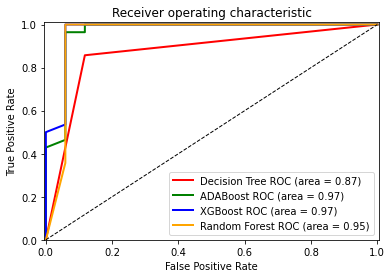

In [30]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_DT, tpr_DT, color='red', lw=2, 
         label='Decision Tree ROC (area = %0.2f)' % AUC_DT)

plt.plot(fpr_AB, tpr_AB, color='green', lw=2, 
         label='ADABoost ROC (area = %0.2f)' % AUC_AB)

plt.plot(fpr_XG, tpr_XG, color='blue', lw=2, 
         label='XGBoost ROC (area = %0.2f)' % AUC_XG)

plt.plot(fpr_RF, tpr_RF, color='orange', lw=2, 
         label='Random Forest ROC (area = %0.2f)' % AUC_RF)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

Which algorithm is the best w.r.t the AUC value?
- I believe the XG boost AUC is the best.
Which algorithm is the best w.r.t the Accuracy value?
- Random and XG boost have the best accuracy value.
Which algorithm is the best when we want a False Positive Rate of %7?
- Decision Tree would work best if we were attempting to get a false positive rate of %7.